In [5]:
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
exptime_list = []

lightcurve = lk.search_lightcurve(f"TIC 158794976", author="TESS-SPOC")
print(lightcurve)
exptime_list =lightcurve.exptime
exptime_list                            # This list tells how many sectors of data are available to download. It contains exptime attribute of each sector

SearchResult containing 4 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 14 2019 TESS-SPOC    1800   158794976      0.0
  1 TESS Sector 40 2021 TESS-SPOC     600   158794976      0.0
  2 TESS Sector 41 2021 TESS-SPOC     600   158794976      0.0
  3 TESS Sector 54 2022 TESS-SPOC     600   158794976      0.0


<Quantity [1800.,  600.,  600.,  600.] s>

In [7]:
exptime_list_length = len(exptime_list)        # We need to know length of each element in exptime_list, as we will download data for each of the sector and plot it seperately
exptime_list_length

4

Period for file number 0 in TESS sectors is 0.3864223102959433 d


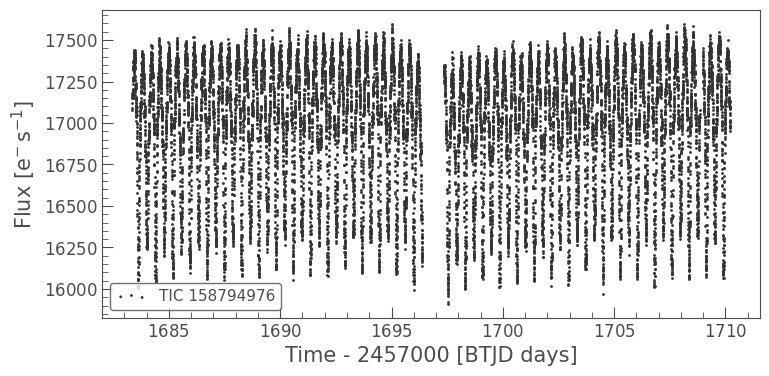

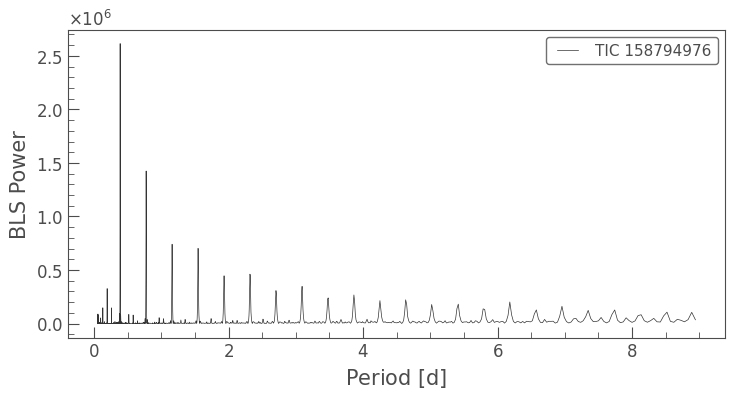

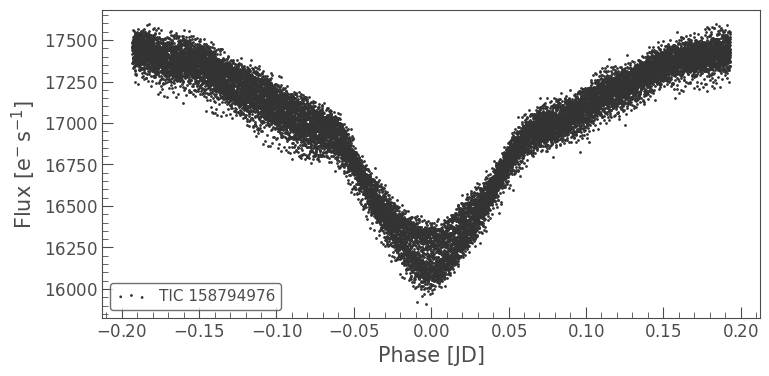

Period for file number 1 in TESS sectors is 0.38642475763077444 d


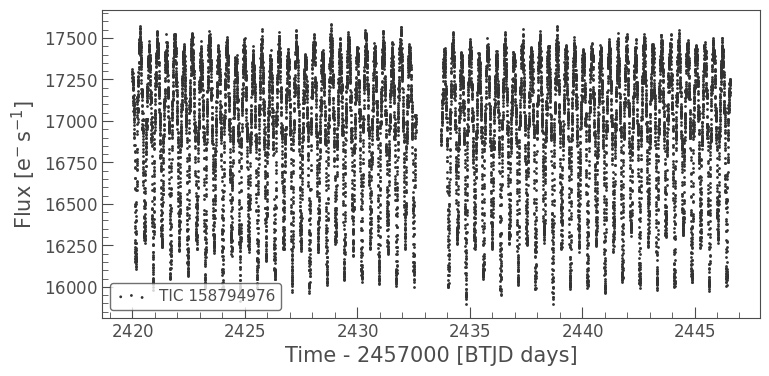

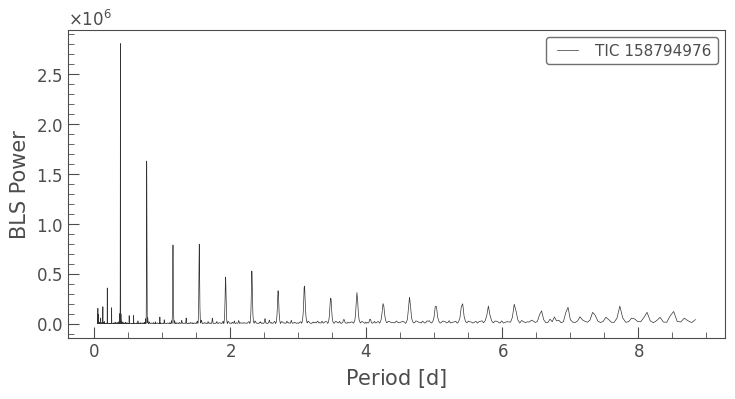

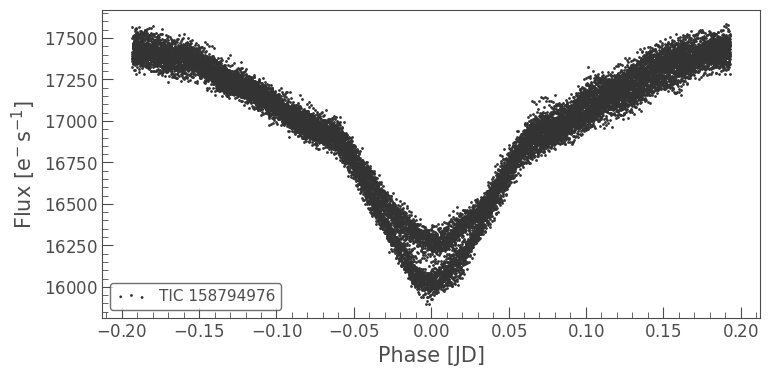

Period for file number 2 in TESS sectors is 0.38646510667852996 d


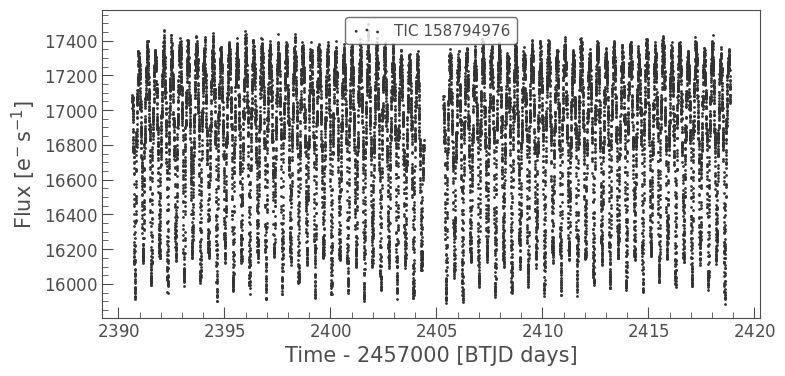

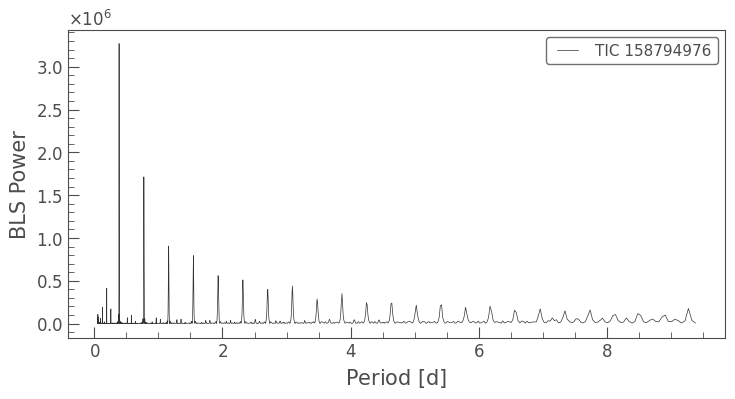

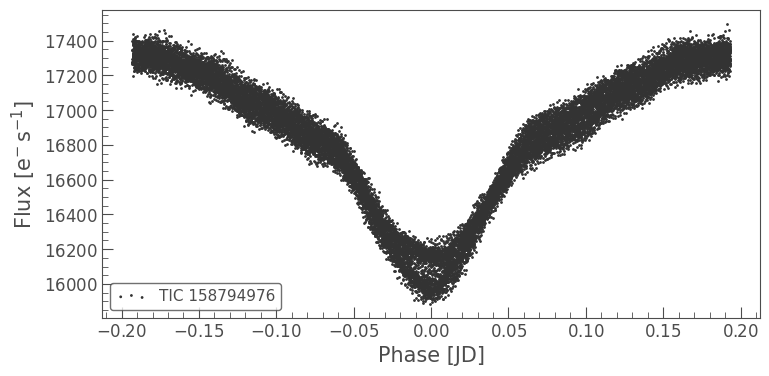

Period for file number 3 in TESS sectors is 0.386381239077205 d


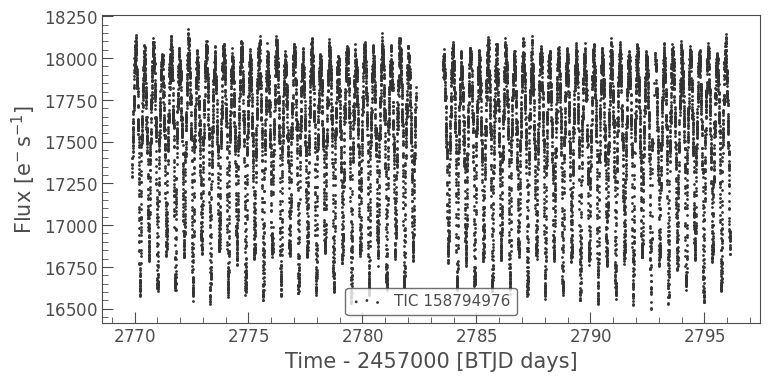

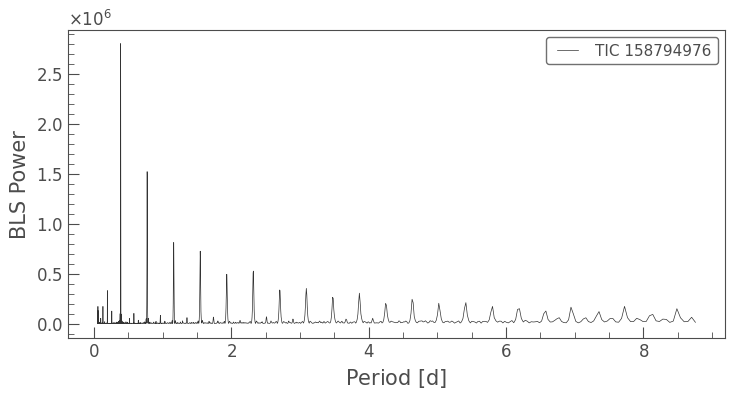

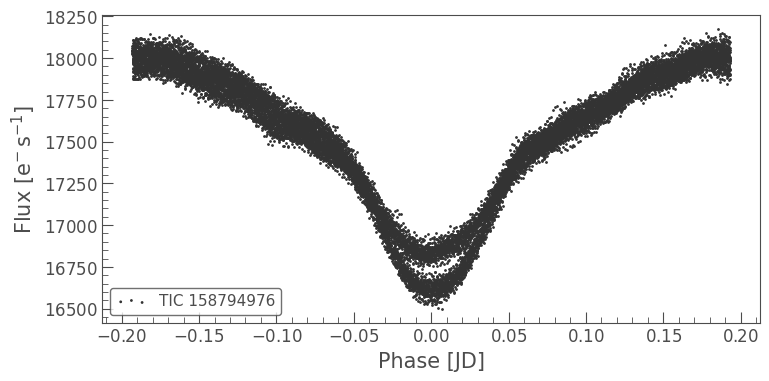

In [8]:
for index, element in enumerate(exptime_list):                          # Now we choose each of that sectors and download data for it and plot it seperately
    try:
        lc = lk.search_lightcurve("TIC 158794976")[index].download()      # for downloading of each sector
        lc.scatter()

        bls = lc.to_periodogram("bls",frequency_factor=10, duration=0.05)          # Box least square function
        print(f"Period for file number {index} in TESS sectors is {bls.period_at_max_power}")
        bls.plot()

        lc.fold(bls.period_at_max_power.value, bls.transit_time_at_max_power).scatter()     # to fold different lightcurves so that the datapoints merge together to give a single lightcurve
        # plt.xlim(-0.5,0.5)
        plt.show()

    except Exception as e:
        print(f"Could not retrieve data for {index}: {e}")  


We see that 0th and 2nd file, i.e, TESS sector 14 and sector 41 gives better lightcurve than other sectors after folding. 

So, We will now only use the sector 14 data for further analysis.